## Example: Creating .gif files on a surface.
In this notebook I use the string class to run an example simulation on a random 2D surface to find the minimum energy path and then show the results in the gifs. The algorithm is based on the "On the fly string method"$^{[2]}$ which is based on the orginial string method.$^{[1]}$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import imageio

from myMD import string

We start by defining a potential function, the function is plotted below with the potential value on the z-axis.

In [2]:
def potential(point):
    X, Y = point
    return 5 * (np.sin(0.5 * X) * np.cos(Y) + 0.001 * (Y**4 + X**4) - 0.1 * (Y**2 + X**2) + 0.02 * (X + Y)**2 + 0.1 * (X + Y) + 0.05 * (X - Y))

In [3]:
xlimit, ylimit = [-9,8], [-9,8.5]
X, Y = np.meshgrid(np.arange(xlimit[0],xlimit[1], 0.01), np.arange(ylimit[0],ylimit[1], 0.01))
energy = potential([X,Y])

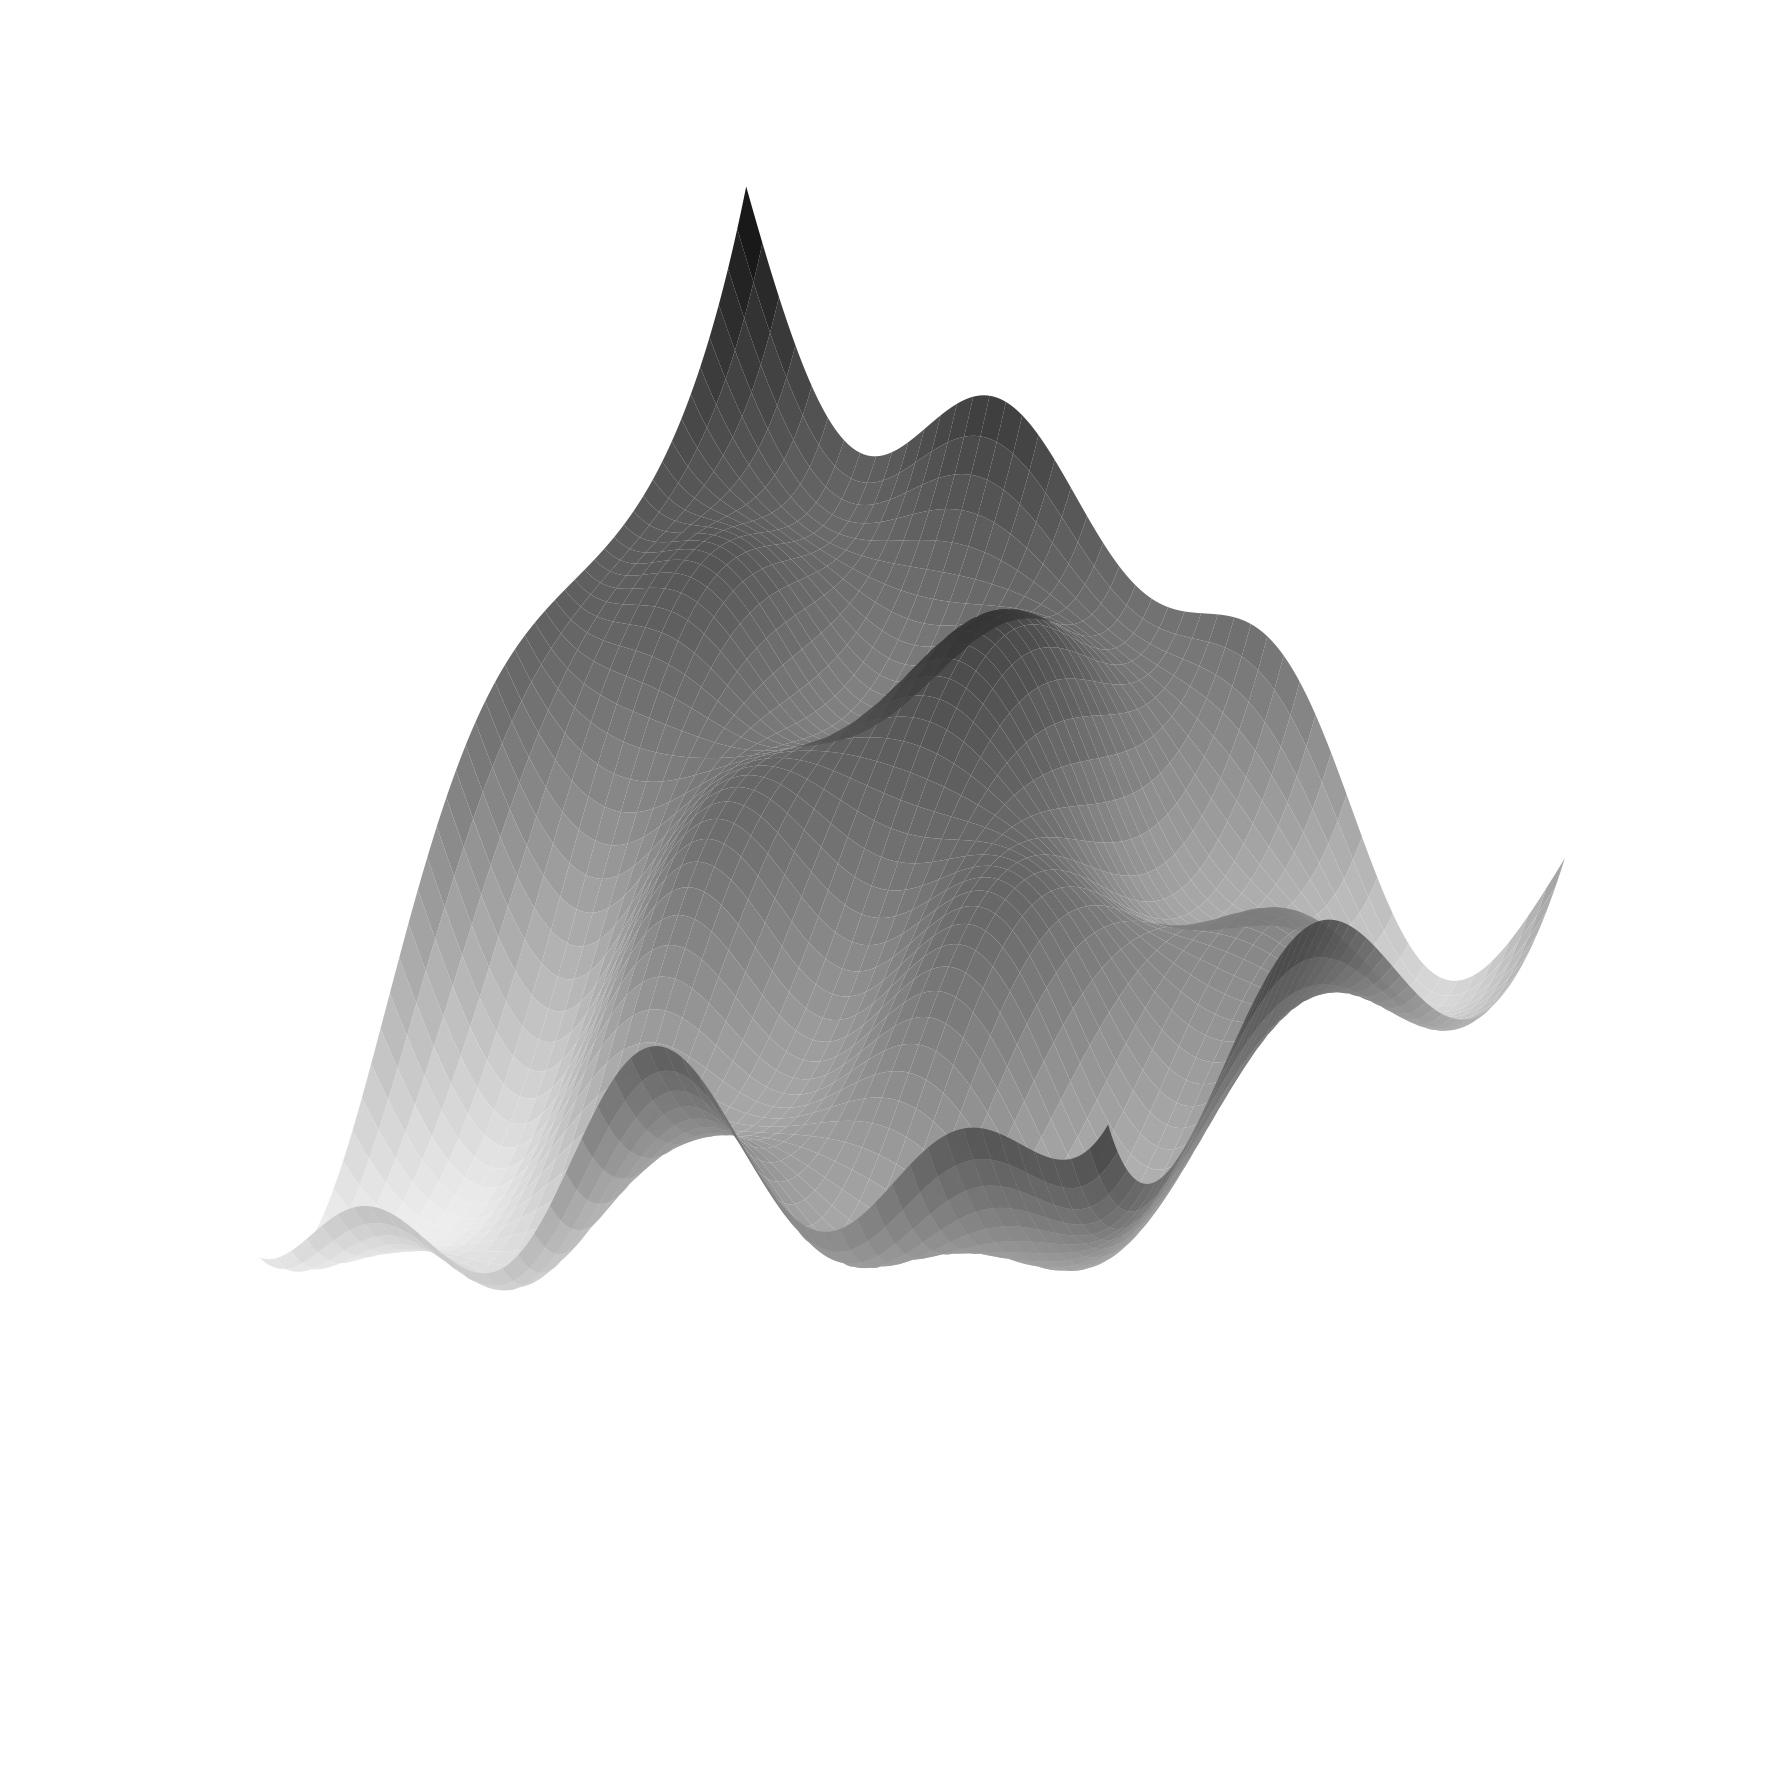

In [4]:
fig = plt.figure(figsize=(14,7),dpi=320)
ax = fig.add_subplot(111, projection="3d")
cmap = LinearSegmentedColormap.from_list('custom_cmap', ['#EEEEEE', '#000000'], N=256)
ax.plot_surface(X, Y, energy, cmap=cmap, alpha=0.9)
ax.view_init(35,-150)
ax.set_axis_off()
plt.savefig('surface.png', bbox_inches='tight')

### Running the string
Now we start by initiating a string object, the arguments we give are
Essential inputs:
1. potential function as defined above. The potential function has to have one single input, being a vector of coordinates in arbitrary dimension.
2. number of nodes<br>

Optionary inputs (given):

3. gamma: The damping factor in the Langevin equation.
4. T: The temperature
5. minima: The two minima (end points of the string)

Optionary inputs (not given):

6. force_constants: The force constants for the harmonic restraints of the nodes
7. path: In case a string trajectory is saved and should be loaded (given in the commented line)

In [5]:
string = string.String(potential, 20, gamma=1, T = 310, minima = [[-7.70368568 , 8.17427009],[ 7.51133262, -6.68477106]])
#string = string.String(potential, path = "string_data")

In [6]:
minima = string.prepare() #always run first to set the positions of the nodes in between the ends

Starting minimization from 
[ 0.00080347 -0.00059509]
Finished minimization with a gradient of [ 0.00080347 -0.00059509].
Starting minimization from 
[-0.00092649 -0.0003767 ]
Finished minimization with a gradient of [-0.00092649 -0.00037575].
Preparation done
 Starting node: [-7.70368568  8.17427009]
 Ending node:   [ 7.51133271 -6.68477102]


In [7]:
string.run() #using defaults: dt = 0.05, steps = 5_000, reposition_period = 100, damping = 30

In [8]:
string.nodes[12].set_restraint([-2,-2.8]) #perturbation to overcome the local minimum

In [9]:
string.run(steps=7500) 

In [10]:
string.save("string_data")

### Check convergence of the string.
In the following plot we plot the final positions of the node and see whether they converged to the minimum free energy path.

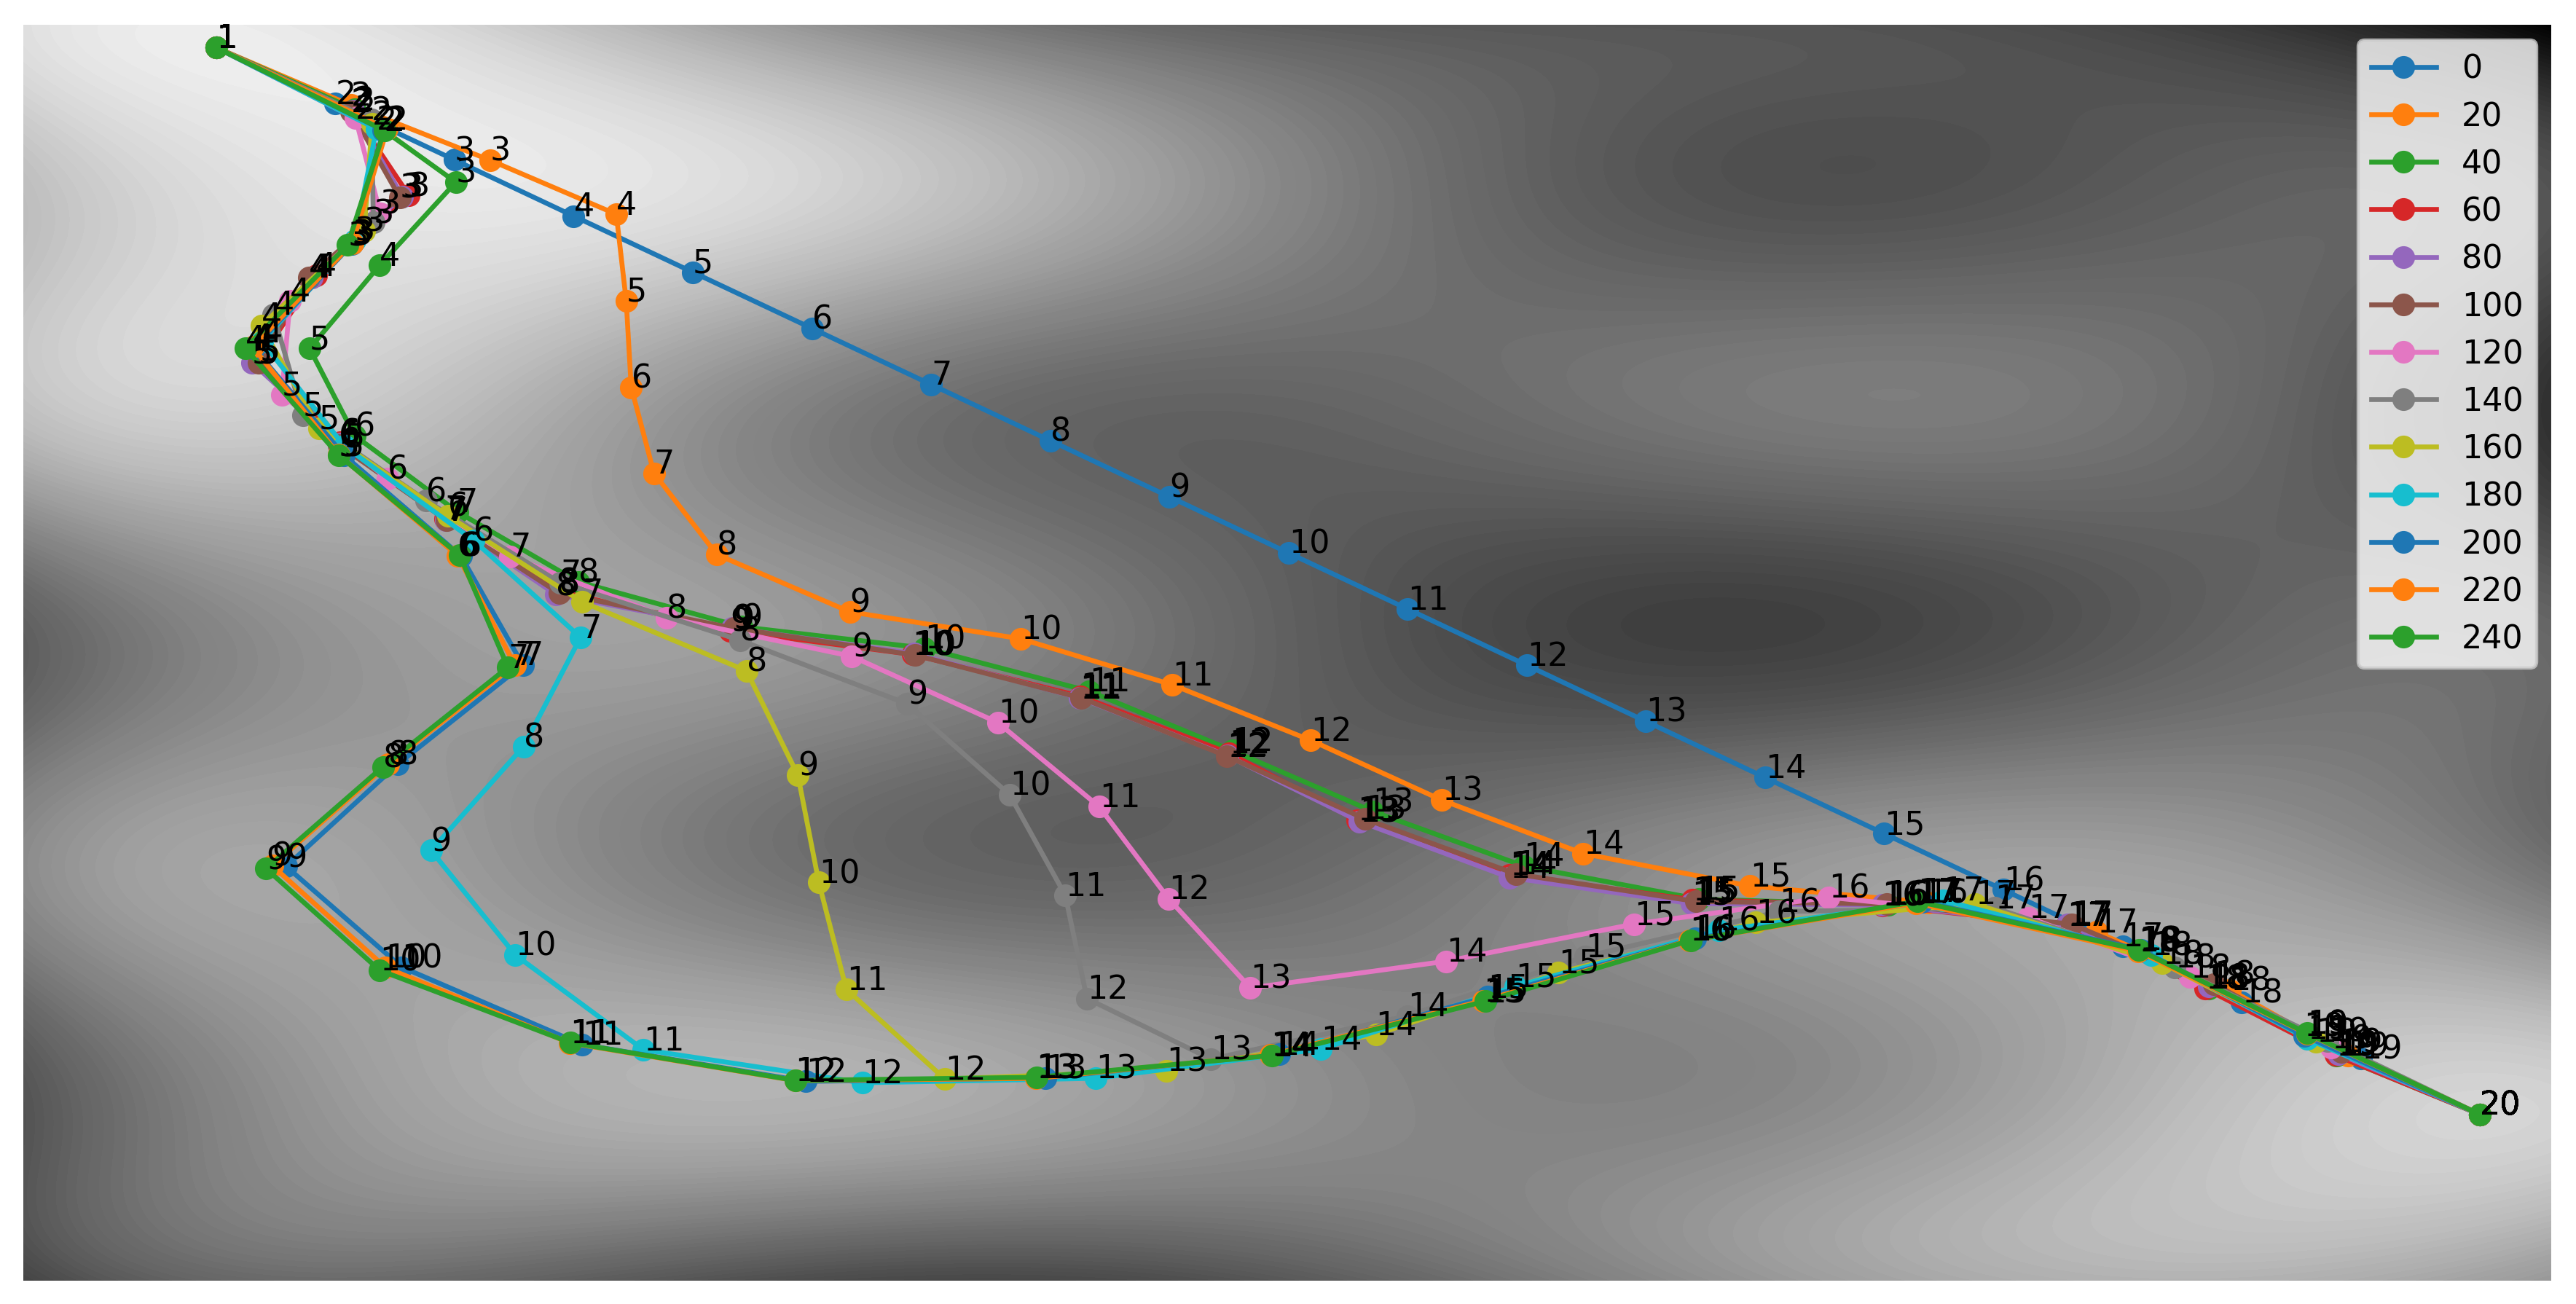

In [11]:
fig = plt.figure(figsize=(14,7),dpi=320)
ax = fig.add_subplot(111)
cmap = LinearSegmentedColormap.from_list('custom_cmap', ['#EEEEEE', '#000000'], N=256)
ax.contourf(X, Y,  energy, cmap=cmap, levels=100)
for i in np.arange(0,len(string.trajectory),20):
    trajectory = np.array(string.trajectory[i])
    ax.plot(trajectory[:,0],trajectory[:,1],marker='o', label=i)
    for j, traj in enumerate(trajectory):
        ax.text(traj[0],traj[1],j+1)
ax.set_xlim(xlimit[0],xlimit[1])
ax.set_ylim(ylimit[0],ylimit[1])
ax.set_axis_off()
ax.legend(loc="upper right")

### Creating Animations
After the convergence has been confirmed, we can finally create the nice .gif's. We first create different perspectives of the full string and then create smaller .gif's of certain stages of the string.

In [12]:
skip = 4 # Determines the number of frames which are skipped, for example skip = 4 means every 4th frame in the trajectory creates a figure
traj_len = len(string.trajectory)

In [13]:
# Creating 2D Plots 
for i in np.arange(0,traj_len,skip):
    fig = plt.figure(figsize=(14,7),dpi=320)
    ax = fig.add_subplot(111)
    cmap = LinearSegmentedColormap.from_list('custom_cmap', ['#EEEEEE', '#000000'], N=256)
    ax.contourf(X, Y,  energy, cmap=cmap, levels=100)
    trajectory = np.array(string.trajectory[i])
    ax.plot(trajectory[:,0],trajectory[:,1],marker='o', label=i, color='lightseagreen')
    ax.set_axis_off()
    ax.set_xlim(xlimit[0],xlimit[1])
    ax.set_ylim(ylimit[0],ylimit[1])
    
    plt.savefig(f'2D/string{i}.png', bbox_inches='tight')
    plt.close()
    print(f"Created image {int(i/skip)+1} of {traj_len}.", end="\r")

In [ ]:
images = []
for i in np.arange(0,traj_len,skip):
    images.append(imageio.v2.imread(f'2D/string{i}.png'))
imageio.mimsave('2D/string.gif', images)

In [ ]:
# Creating 3D Animation
for i in np.arange(0,traj_len,skip):
    fig = plt.figure(figsize=(14,7),dpi=320)
    ax = fig.add_subplot(111, projection="3d")
    cmap = LinearSegmentedColormap.from_list('custom_cmap', ['#EEEEEE', '#000000'], N=256)
    ax.plot_surface(X, Y, energy, cmap=cmap, alpha=0.9, zorder=0)
    trajectory = np.array(string.trajectory[i])
    ax.plot(trajectory[:,0],trajectory[:,1],potential([trajectory[:,0],trajectory[:,1]]),marker='o', label=i, color='lightseagreen')
    ax.set_axis_off()
    ax.view_init(45,-150)
    ax.set_xlim(xlimit[0],xlimit[1])
    ax.set_ylim(ylimit[0],ylimit[1])
    
    plt.savefig(f'3D/string{i}.png', bbox_inches='tight')
    plt.close()
    print(f"Created image {int(i/skip)+1} of {traj_len}.", end="\r")

In [ ]:
images = []
for i in np.arange(0,traj_len,skip):
    images.append(imageio.v2.imread(f'3D/string{i}.png'))
imageio.mimsave('3D/string.gif', images)

In [ ]:
# Creating dual plot Animation with 3D on the left and energy diagramm on the right
for i in np.arange(0,traj_len,skip):
    trajectory = np.array(string.trajectory[i])
    fig = plt.figure(figsize=(14,7),dpi=320)
    
    ax1 = fig.add_subplot(121, projection="3d")
    cmap = LinearSegmentedColormap.from_list('custom_cmap', ['#EEEEEE', '#000000'], N=256)
    ax1.plot_surface(X, Y, energy, cmap=cmap, alpha=0.9, zorder=0)
    ax1.plot(trajectory[:,0],trajectory[:,1],potential([trajectory[:,0],trajectory[:,1]]),marker='o', label=i, color='lightseagreen')
    ax1.set_axis_off()
    ax1.view_init(45,-150)
    ax1.set_xlim(xlimit[0],xlimit[1])
    ax1.set_ylim(ylimit[0],ylimit[1])

    ax2 = fig.add_subplot(122)
    energies = []
    for k in range(len(trajectory)-1):
        for j in range(10):
            energies.append(potential(trajectory[k] + j/10*(trajectory[k+1]-trajectory[k])))
    energies.append(potential(trajectory[-1]))
    energies = np.array(energies) - energies[0]
    RC = np.linspace(0,20,len(energies))
    ax2.plot(RC,energies,color="lightseagreen")
    ax2.set_xlabel("Reaction Coordinate")
    ax2.set_ylabel("Energy")
    ax2.set_xticks([])
    ax2.set_ylim(-1,31)
    plt.savefig(f'double/string{i}.png', bbox_inches='tight')
    plt.close()
    print(f"Created image {int(i/skip)+1} of {traj_len}.", end="\r")

In [ ]:
images = []
for i in np.arange(0,traj_len,skip):
    images.append(imageio.v2.imread(f'double/string{i}.png'))
imageio.mimsave('double/string.gif', images)

### Create specific parts of the string as .gif

In [ ]:
# The first convergence (0-49)
images = []
for i in np.arange(0,50,skip):
    images.append(imageio.v2.imread(f'double/string{i}.png'))
# Specify duration and frames per second (fps)
duration = 0.01
quantizer = 'nq'  
imageio.mimsave('double/first_convergence.gif', images, duration=duration, quantizer=quantizer)

In [ ]:
# The first fixed stage (50-99)
images = []
for i in np.arange(int(50/skip)*skip,100,skip):
    images.append(imageio.v2.imread(f'double/string{i}.png'))
# Specify duration and frames per second (fps)
duration = 0.01
quantizer = 'nq'  
imageio.mimsave('double/first_fixed_stage.gif', images, duration=duration, quantizer=quantizer)

In [ ]:
# The perturbation and convergence (101-200)
images = []
for i in np.arange(int(100/skip)*skip,200,skip):
    images.append(imageio.v2.imread(f'double/string{i}.png'))
# Specify duration and frames per second (fps)
duration = 0.01
quantizer = 'nq'  
imageio.mimsave('double/second_convergence.gif', images, duration=duration, quantizer=quantizer)

In [ ]:
# The second and final fixed stage (201-)
images = []
for i in np.arange(int(200/skip)*skip,250,skip):
    images.append(imageio.v2.imread(f'double/string{i}.png'))
# Specify duration and frames per second (fps)
duration = 0.01
quantizer = 'nq'  
imageio.mimsave('double/second_fixed_stage.gif', images, duration=duration, quantizer=quantizer)

## References

[1] Maragliano, L., Fischer, A., Vanden-Eijnden, E., & Ciccotti, G. (2006). String method in collective variables: Minimum free energy paths and isocommittor surfaces. *The Journal of Chemical Physics*, 125(2), 024106. [DOI:10.1063/1.2212942](https://doi.org/10.1063/1.2212942)<br>
[2] Maragliano, L., & Vanden-Eijnden, E. (2007). On-the-fly string method for minimum free energy paths calculation. *Chemical Physics Letters*, 446(1), 182-190. [DOI:10.1016/j.cplett.2007.08.017](https://doi.org/10.1016/j.cplett.2007.08.017)